In [1]:
# Langkah 1: Instal library yfinance untuk mengambil data dari Yahoo Finance
!pip install yfinance

# Sekarang, kita panggil semua "perkakas" yang kita butuhkan
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Perkakas sudah siap!")

Perkakas sudah siap!


In [2]:
# Langkah 2: Tentukan daftar aset dan rentang waktu
# Ticker ini adalah kode unik untuk setiap aset di pasar keuangan
tickers = ['BTC-USD', 'GLD', '^GSPC', 'IDR=X']

# Tentukan tanggal mulai dan tanggal selesai
start_date = '2020-01-01'
end_date = '2025-07-28' # Kita bisa pakai tanggal hari ini

print("Daftar aset dan tanggal sudah ditentukan.")

Daftar aset dan tanggal sudah ditentukan.


In [5]:
# Langkah 3: Unduh data harga historis menggunakan yfinance
data = yf.download(tickers, start=start_date, end=end_date)

# Kita hanya butuh harga penutupan yang sudah disesuaikan (Adjusted Close)
harga = data['Close']

# Mari kita lihat 5 baris pertama data kita untuk memastikan semuanya benar
print("Data berhasil diunduh. Ini 5 baris pertamanya:")
print(harga.head())

/tmp/ipython-input-5-1235163116.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  4 of 4 completed

Data berhasil diunduh. Ini 5 baris pertamanya:
Ticker          BTC-USD         GLD         IDR=X        ^GSPC
Date                                                          
2020-01-01  7200.174316         NaN  13690.372070          NaN
2020-01-02  6985.470215  143.949997  13689.231445  3257.850098
2020-01-03  7344.884277  145.860001  13884.786133  3234.850098
2020-01-04  7410.656738         NaN           NaN          NaN
2020-01-05  7411.317383         NaN           NaN          NaN


In [6]:
# Langkah 4: Tangani nilai yang hilang (jika ada)
# Kita isi nilai yang hilang dengan nilai sebelumnya (forward fill)
harga = harga.ffill()

# Hitung imbal hasil harian (daily returns)
imbal_hasil = harga.pct_change().dropna()

print("Imbal hasil harian berhasil dihitung. Ini 5 baris pertamanya:")
display(imbal_hasil.head())

Imbal hasil harian berhasil dihitung. Ini 5 baris pertamanya:


Ticker,BTC-USD,GLD,IDR=X,^GSPC
Date,,,,
2020-01-03,0.051452,0.013269,0.014285,-0.007060
2020-01-04,0.008955,0.000000,0.000000,0.000000
2020-01-05,0.000089,0.000000,0.000000,0.000000
2020-01-06,0.048291,0.010490,0.003567,0.003533
2020-01-07,0.050774,0.003935,-0.000561,-0.002803


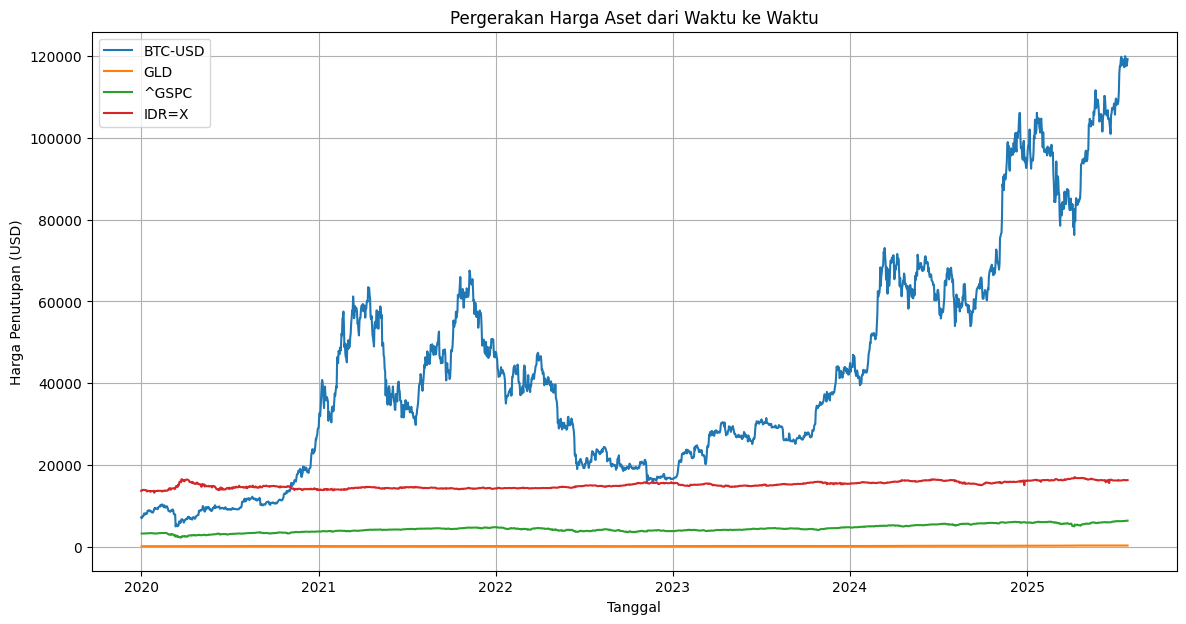

In [7]:
# Langkah 5: Visualisasi data
# Mari kita lihat bagaimana harga aset-aset ini bergerak dari waktu ke waktu
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(harga.index, harga[ticker], label=ticker)

plt.title('Pergerakan Harga Aset dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Langkah 6: Hitung matriks korelasi
matriks_korelasi = imbal_hasil.corr()

print("Matriks korelasi imbal hasil harian:")
display(matriks_korelasi)

Matriks korelasi imbal hasil harian:


Ticker,BTC-USD,GLD,IDR=X,^GSPC
Ticker,,,,
BTC-USD,1.000000,0.130925,0.011898,0.349938
GLD,0.130925,1.000000,0.029816,0.135878
IDR=X,0.011898,0.029816,1.000000,0.051131
^GSPC,0.349938,0.135878,0.051131,1.000000


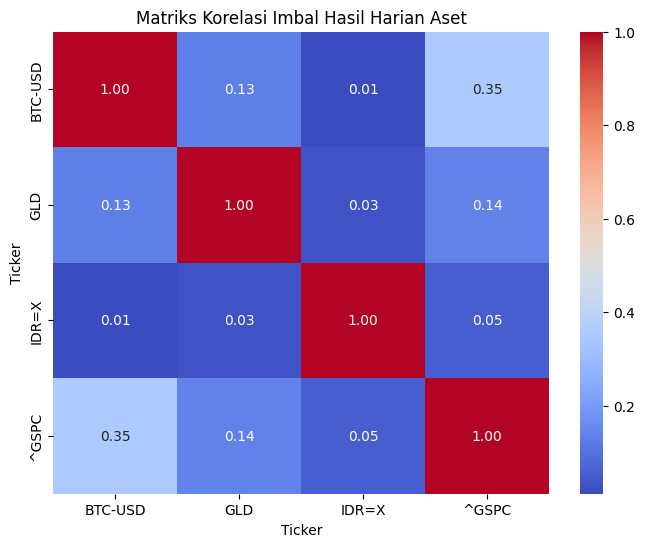

In [9]:
# Langkah 7: Visualisasikan matriks korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Imbal Hasil Harian Aset')
plt.show()

# Analisis Harga dan Korelasi Aset Finansial

Notebook ini melakukan analisis dasar terhadap pergerakan harga historis dan korelasi harian dari beberapa aset finansial, meliputi:
- **BTC-USD:** Harga Bitcoin terhadap Dolar AS
- **GLD:** Harga Emas (melalui ETF SPDR Gold Shares)
- **IDR=X:** Nilai tukar Dolar AS terhadap Rupiah Indonesia
- **^GSPC:** Indeks S&P 500 (proxy pasar saham AS)

Data diambil menggunakan library `yfinance` dari Yahoo Finance. Analisis ini mencakup visualisasi harga dari waktu ke waktu dan perhitungan matriks korelasi imbal hasil harian untuk memahami hubungan antar aset.